In [3]:
import sys
import pandas as pd
import numpy as np

 
df=pd.read_csv('../results/cleaned_data.csv')

<h1> User Overview analysis  </h1>

<ul><li>Top 10 handsets used by the customers</li></ul>

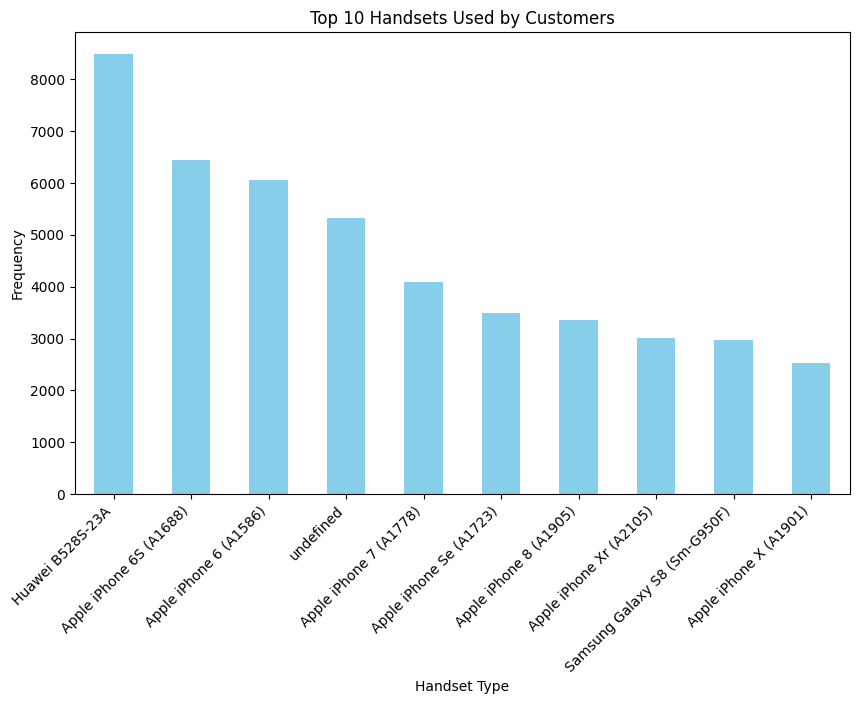

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming your DataFrame is named df
top_10_handsets = df['Handset Type'].value_counts().head(10)

# Plotting the top 10 handsets
plt.figure(figsize=(10, 6))
top_10_handsets.plot(kind='bar', color='skyblue')
plt.title('Top 10 Handsets Used by Customers')
plt.xlabel('Handset Type')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')
plt.show()


<ul><li> Top 3 handset manufacturers</li></ul>

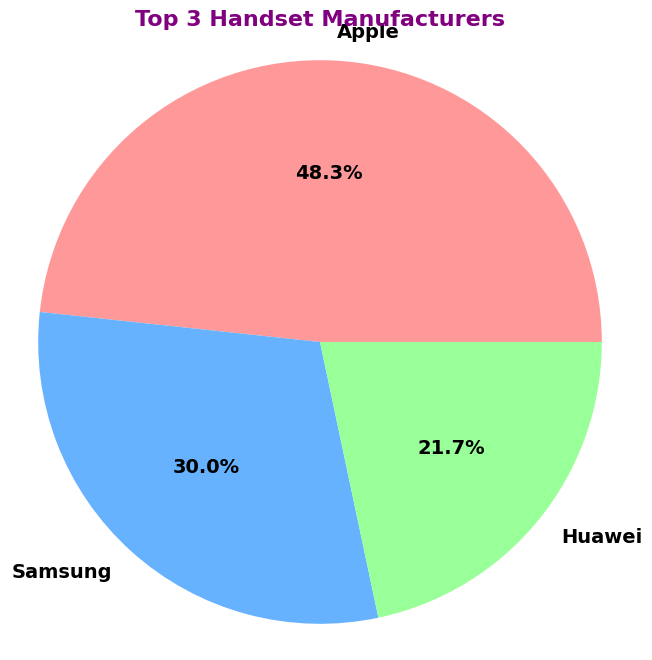

In [5]:
# Identify the top 3 handset manufacturers
top_3_manufacturers = df['Handset Manufacturer'].str.split().str[0].value_counts().head(3)

# Define colors for the pie chart
colors = ['#FF9999', '#66B2FF', '#99FF99']

# Plot the pie chart
top_3_manufacturers.plot(kind='pie', autopct='%1.1f%%', figsize=(8, 8), colors=colors, labels=top_3_manufacturers.index, textprops={'fontsize': 14, 'fontweight': 'bold'})
plt.title('Top 3 Handset Manufacturers', fontsize=16, fontweight='bold', color='purple')
plt.ylabel('')
plt.axis('equal')
plt.show()


<ul><li>Top 5 handsets per top 3 handset manufacturer</li></ul>

C:\Users\dell\AppData\Local\Temp\ipykernel_9892\2917646981.py:14: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  pivot_df.plot(kind='bar', figsize=(12, 8), color=plt.cm.get_cmap('Set3').colors)


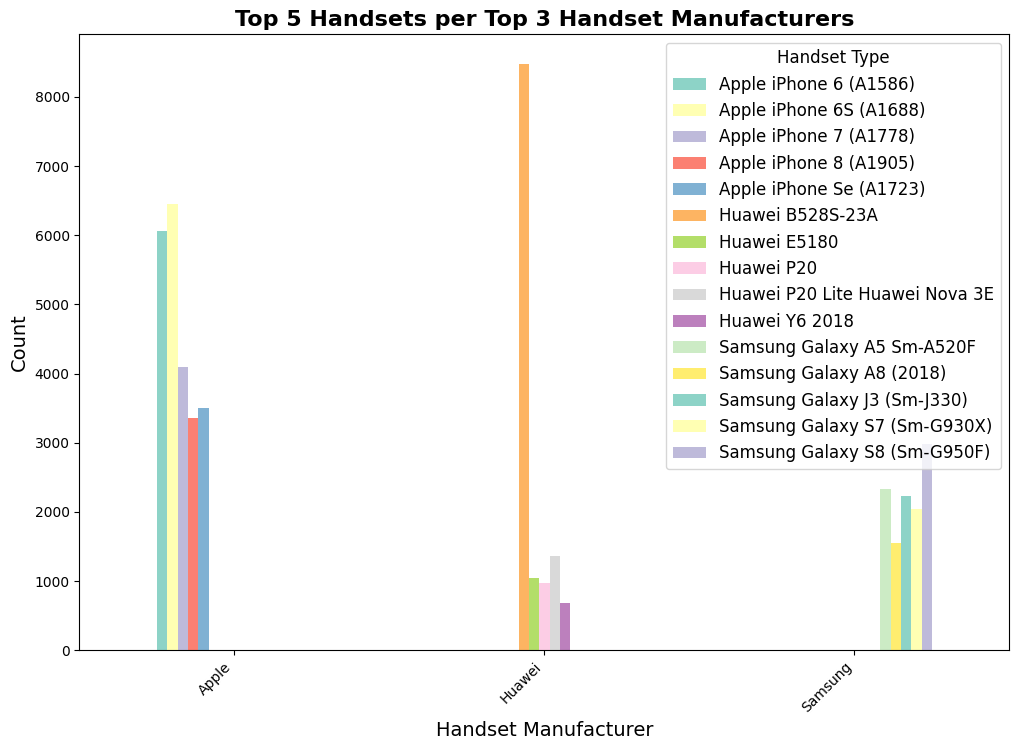

In [6]:
# Filter DataFrame to include only data for top 3 manufacturers
top_3_df = df[df['Handset Manufacturer'].str.split().str[0].isin(top_3_manufacturers.index)]

# Identify the top 5 handsets per top 3 handset manufacturer
top_5_handsets = top_3_df.groupby(['Handset Manufacturer', 'Handset Type']).size().groupby(level=0, group_keys=False).nlargest(5)

# Reset index for plotting
top_5_handsets = top_5_handsets.reset_index()

# Pivot the DataFrame for plotting
pivot_df = top_5_handsets.pivot(index='Handset Manufacturer', columns='Handset Type', values=0)

# Plot the grouped bar chart
pivot_df.plot(kind='bar', figsize=(12, 8), color=plt.cm.get_cmap('Set3').colors)
plt.title('Top 5 Handsets per Top 3 Handset Manufacturers', fontsize=16, fontweight='bold')
plt.xlabel('Handset Manufacturer', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.legend(title='Handset Type', fontsize=12, title_fontsize=12)
plt.show()

In [7]:
# Concatenate 'IMSI', 'MSISDN/Number', and 'IMEI' columns to create a unique identifier
df['Unique_ID'] = df['IMSI'].astype(str) + '_' + df['MSISDN/Number'].astype(str) + '_' + df['IMEI'].astype(str)

# Check if the 'Unique_ID' column contains unique values for all entries
is_unique = df['Unique_ID'].nunique() == len(df)

# Print the result
print("Is 'Unique_ID' unique for all entries?", is_unique)


Is 'Unique_ID' unique for all entries? False


<h3>Users’ behaviour on applications</h3>

<ul><li>Number of xDR Sessions</li></ul>

In [8]:
# Aggregate the number of xDR sessions per user
aggregated_df = df.groupby('MSISDN/Number').size().reset_index(name='Number of xDR sessions')
print(aggregated_df)

        MSISDN/Number  Number of xDR sessions
0        3.360100e+10                       1
1        3.360100e+10                       1
2        3.360100e+10                       1
3        3.360101e+10                       1
4        3.360101e+10                       1
...               ...                     ...
129487   3.378992e+10                       1
129488   3.378995e+10                       1
129489   3.378996e+10                       1
129490   3.378996e+10                       1
129491   3.378998e+10                       2

[129492 rows x 2 columns]


<ul><li>Session duration</li></ul>

In [9]:
session_duration_per_user = df.groupby('MSISDN/Number')['Dur. (ms)'].sum().reset_index()

# Convert duration from milliseconds to seconds and round to 2 decimal places
session_duration_per_user['Session Duration (s)'] = session_duration_per_user['Dur. (ms)'] / 1000
session_duration_per_user['Session Duration (s)'] = session_duration_per_user['Session Duration (s)'].round(2)

session_duration_per_user.drop(columns=['Dur. (ms)'], inplace=True)

aggregated_df = aggregated_df.merge(session_duration_per_user, on='MSISDN/Number', how='left')

print(aggregated_df)

        MSISDN/Number  Number of xDR sessions  Session Duration (s)
0        3.360100e+10                       1                  0.00
1        3.360100e+10                       1                  0.00
2        3.360100e+10                       1                  0.00
3        3.360101e+10                       1                  0.00
4        3.360101e+10                       1                  0.00
...               ...                     ...                   ...
129487   3.378992e+10                       1                  0.00
129488   3.378995e+10                       1                  0.00
129489   3.378996e+10                       1                  0.00
129490   3.378996e+10                       1                  0.00
129491   3.378998e+10                       2                  0.01

[129492 rows x 3 columns]


<ul><li>Total download and Upload data </li></ul>

In [10]:
# Group by MSISDN/Number and sum the total DL and UL data for each user
total_data_per_user = df.groupby('MSISDN/Number')[['Total DL (Bytes)', 'Total UL (Bytes)']].sum().reset_index()

# Convert bytes to megabytes (MB) and round to 2 decimal places
total_data_per_user['Total DL (MB)'] = total_data_per_user['Total DL (Bytes)'] / (1024 * 1024)
total_data_per_user['Total DL (MB)'] = total_data_per_user['Total DL (MB)'].round(2)

total_data_per_user['Total UL (MB)'] = total_data_per_user['Total UL (Bytes)'] / (1024 * 1024)
total_data_per_user['Total UL (MB)'] = total_data_per_user['Total UL (MB)'].round(2)

# Drop the original columns for total DL and UL data
total_data_per_user.drop(columns=['Total DL (Bytes)', 'Total UL (Bytes)'], inplace=True)

aggregated_df = aggregated_df.merge(total_data_per_user, on='MSISDN/Number', how='left')
print(aggregated_df)


        MSISDN/Number  Number of xDR sessions  Session Duration (s)  \
0        3.360100e+10                       1                  0.00   
1        3.360100e+10                       1                  0.00   
2        3.360100e+10                       1                  0.00   
3        3.360101e+10                       1                  0.00   
4        3.360101e+10                       1                  0.00   
...               ...                     ...                   ...   
129487   3.378992e+10                       1                  0.00   
129488   3.378995e+10                       1                  0.00   
129489   3.378996e+10                       1                  0.00   
129490   3.378996e+10                       1                  0.00   
129491   3.378998e+10                       2                  0.01   

        Total DL (MB)  Total UL (MB)  
0                 0.0            0.0  
1                 0.0            0.0  
2                 0.0         

<ul><li> Total data volume of these sessions</li></ul>

In [11]:
# Group by MSISDN/Number and sum the data volume for each application
total_data_per_app = df.groupby('MSISDN/Number')[['Social Media DL (Bytes)', 'Social Media UL (Bytes)',
                                                  'Google DL (Bytes)', 'Google UL (Bytes)',
                                                  'Email DL (Bytes)', 'Email UL (Bytes)',
                                                  'Youtube DL (Bytes)', 'Youtube UL (Bytes)',
                                                  'Netflix DL (Bytes)', 'Netflix UL (Bytes)',
                                                  'Gaming DL (Bytes)', 'Gaming UL (Bytes)',
                                                  'Other DL (Bytes)', 'Other UL (Bytes)']].sum().reset_index()

# Print the total data volume per application
aggregated_df = aggregated_df.merge(total_data_per_app, on='MSISDN/Number', how='left')
print(aggregated_df)


        MSISDN/Number  Number of xDR sessions  Session Duration (s)  \
0        3.360100e+10                       1                  0.00   
1        3.360100e+10                       1                  0.00   
2        3.360100e+10                       1                  0.00   
3        3.360101e+10                       1                  0.00   
4        3.360101e+10                       1                  0.00   
...               ...                     ...                   ...   
129487   3.378992e+10                       1                  0.00   
129488   3.378995e+10                       1                  0.00   
129489   3.378996e+10                       1                  0.00   
129490   3.378996e+10                       1                  0.00   
129491   3.378998e+10                       2                  0.01   

        Total DL (MB)  Total UL (MB)  Social Media DL (Bytes)  \
0                 0.0            0.0                 2.747714   
1                

In [12]:
aggregated_df.columns

Index(['MSISDN/Number', 'Number of xDR sessions', 'Session Duration (s)',
       'Total DL (MB)', 'Total UL (MB)', 'Social Media DL (Bytes)',
       'Social Media UL (Bytes)', 'Google DL (Bytes)', 'Google UL (Bytes)',
       'Email DL (Bytes)', 'Email UL (Bytes)', 'Youtube DL (Bytes)',
       'Youtube UL (Bytes)', 'Netflix DL (Bytes)', 'Netflix UL (Bytes)',
       'Gaming DL (Bytes)', 'Gaming UL (Bytes)', 'Other DL (Bytes)',
       'Other UL (Bytes)'],
      dtype='object')

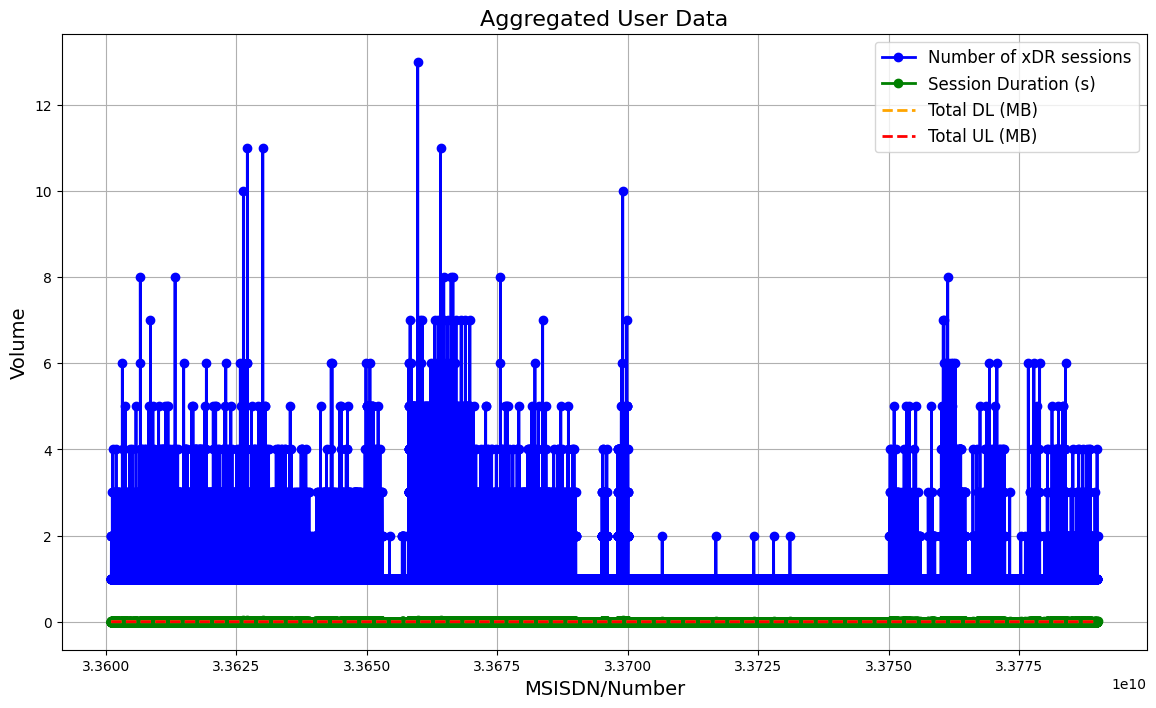

In [13]:
import matplotlib.pyplot as plt

# Create a figure and axis object
fig, ax = plt.subplots(figsize=(14, 8))

# Plot number of xDR sessions
ax.plot(aggregated_df['MSISDN/Number'], aggregated_df['Number of xDR sessions'], color='blue', marker='o', linestyle='-', linewidth=2, label='Number of xDR sessions')

# Plot session duration
ax.plot(aggregated_df['MSISDN/Number'], aggregated_df['Session Duration (s)'], color='green', marker='o', linestyle='-', linewidth=2, label='Session Duration (s)')

# Plot total download (DL) and upload (UL) data
ax.plot(aggregated_df['MSISDN/Number'], aggregated_df['Total DL (MB)'], color='orange', linestyle='--', linewidth=2, label='Total DL (MB)')
ax.plot(aggregated_df['MSISDN/Number'], aggregated_df['Total UL (MB)'], color='red', linestyle='--', linewidth=2, label='Total UL (MB)')

# Add labels and title
ax.set_xlabel('MSISDN/Number', fontsize=14)
ax.set_ylabel('Volume', fontsize=14)
ax.set_title('Aggregated User Data', fontsize=16)

# Add legend
ax.legend(fontsize=12)

# Show plot
plt.grid(True)
plt.show()
